<br> 
<br>

## 1. Basic handling with SQLite3

<br> 
<br>

## 1-1. Import SQLite3

In [ ]:
import sqlite3 # built-in library (Python 2.x & 3.x)

print(sqlite3.sqlite_version)
print(sqlite3.version)

<br> 
<br>

## 1-2. Create connection & SQLite3 Cursor (a method of the connection object)

In [ ]:
dbpath = "maindb.db" # or "maindb.sqlite"

conn = sqlite3.connect(dbpath)
cur = conn.cursor() 

# conn.cursor(), conn.commit/rollback(), conn.close() <- conn.commit() : 저장 vs conn.rollback() : 마지막 commit 이후의 변경사항 모두 취소 
# cur.execute/executescript/executemany(), cur.fetchone/fetchall()

<br> 
<br>

## 1-3. Execute scripts with SQLite3 Cursor & Save the changes

<br> 
<br>

**Datatypes** in SQLite3 
@ https://www.sqlitetutorial.net/sqlite-data-types/ (한글 : https://araikuma.tistory.com/681)

- #### **NULL** : missing information or unknown.
- #### **INTEGER (or INT)** : Integer values are whole numbers (positive or negative). An integer can have variable sizes such as 1, 2,3, 4, or 8 bytes.
- #### **REAL** : a floating point value, real numbers with decimal values that use 8-byte floats.
- #### **TEXT (or VARCHAR)** : a text string, SQLite supports various character encodings. (UTF-8, UTF-16BE or UTF-16LE)
- #### **BLOB** : stands for a binary large object that can store any kind of data. 

<br>

Field의 Datatype을 지칭하는 이름은 DBMS의 종류별로 대동소이합니다.
<br>
ex) Datatypes in MySQL @ https://dev.mysql.com/doc/refman/8.0/en/data-types.html & http://blog.naver.com/islove8587/221036036689

In [ ]:
# cur.execute("CREATE TABLE employees(id INTEGER PRIMARY KEY, name TEXT NOT NULL, salary REAL, department TEXT, position TEXT, hireDate TEXT)")
# con.commit()

In [ ]:
script = """
-- employees 테이블이 이미 있다면 제거
DROP TABLE IF EXISTS employees;

-- employees 테이블 생성 
CREATE TABLE employees(
id INTEGER PRIMARY KEY AUTOINCREMENT,
name TEXT NOT NULL, 
salary REAL,
department TEXT,
position TEXT,
hireDate TEXT);

-- employees 테이블에 데이터(row == record == instance) 넣기
INSERT INTO employees(name, salary, department, position, hireDate) VALUES('Dave', 300, 'Marketing', 'LV1', '2020-01-01');
INSERT INTO employees(name, salary, department, position, hireDate) VALUES('Clara', 420, 'Sales', 'LV2', '2018-01-11');
INSERT INTO employees(id, name, salary, department, position, hireDate) VALUES(3, 'Jane', 620, 'Developer', 'LV4', '2015-11-01');
-- 전체 필드에 빠짐없이 값을 넣을 시 필드명 생략 가능 
INSERT INTO employees VALUES(4, 'Peter', 530, 'Developer', 'LV2', '2020-11-01'); 
"""

cur.executescript(script)
conn.commit() # 실제로 DB에 위 Table & Data가 저장된다.

In [ ]:
data = [('Elena', 510, 'Recruiter', 'LV3', '2020-07-01'), 
        ('Sujan', 710, 'HR', 'LV5', '2014-06-01'),
        ('Jake', 210, 'CEO', 'LV8', '2012-01-01')]

cur.executemany("INSERT INTO employees(name, salary, department, position, hireDate) VALUES(?, ?, ?, ?, ?)", data)
conn.commit()

In [13]:
cur.execute("SELECT * FROM employees;")

employee_list = cur.fetchall()

for employee in employee_list:
    print(employee)

(1, 'Dave', 300.0, 'Marketing', 'LV1', '2020-01-01')
(2, 'Clara', 420.0, 'Sales', 'LV2', '2018-01-11')
(3, 'Jane', 620.0, 'Developer', 'LV4', '2015-11-01')
(4, 'Peter', 530.0, 'Developer', 'LV2', '2020-11-01')


In [15]:
# Checking column names with fetched data

print([col[0] for col in cur.description])
# print(cur.description) # https://j.mp/3f2xc6l

['id', 'name', 'salary', 'department', 'position', 'hireDate']
(('id', None, None, None, None, None, None), ('name', None, None, None, None, None, None), ('salary', None, None, None, None, None, None), ('department', None, None, None, None, None, None), ('position', None, None, None, None, None, None), ('hireDate', None, None, None, None, None, None))


In [ ]:
import pandas as pd

df = pd.read_sql_query("SELECT * FROM employees", conn) 
df

<br> 
<br>

## 1-4. Closing connection of SQLite3 
: 연결을 Close 해주어야 DB 파일인 .sqlite 파일의 삭제 등이 가능합니다.

In [16]:
conn.close()

<br> 
<br>

## 1-5. Browsing DB tables with [ DB Browser for SQLite ]

- Installer download @ https://github.com/sqlitebrowser/sqlitebrowser
- We will use [ DB Browser for SQLite - **.zip (no installer)** for 64-bit Windows ] 
- Unzip the .zip file & execute **"DB Browser for SQLite.exe"**

<hr>

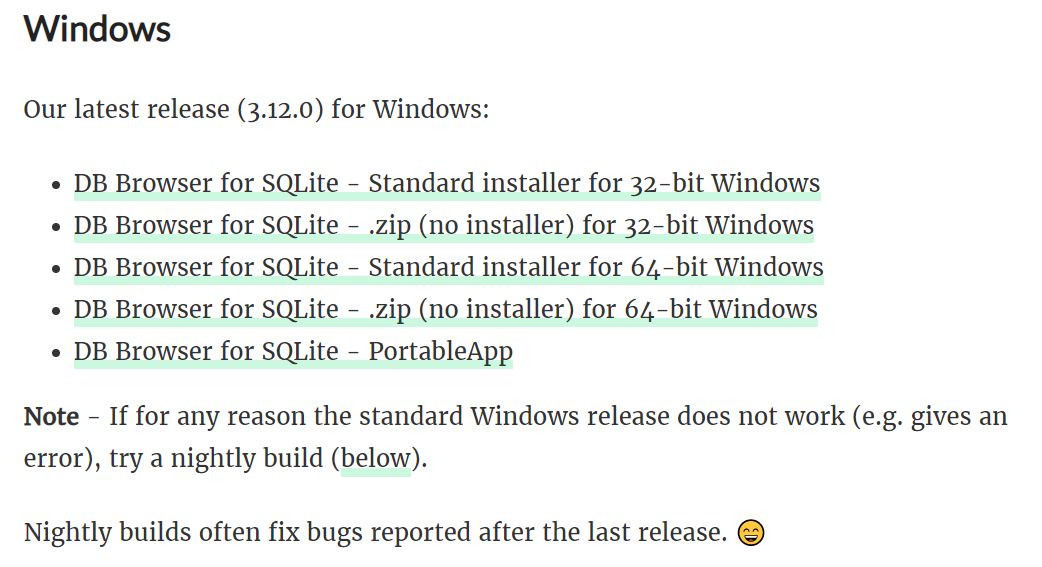

<hr>


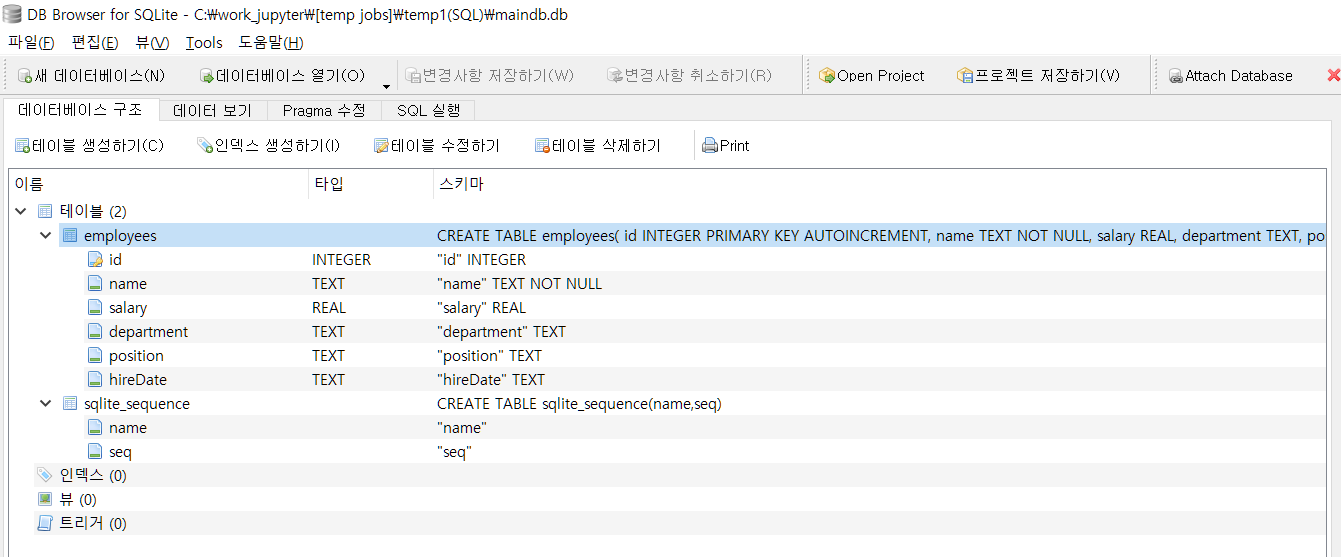

<br>
<hr>

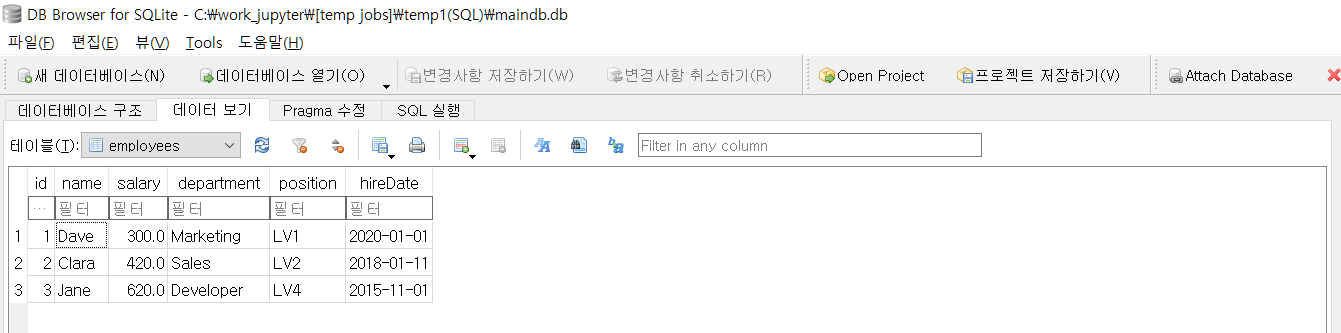

<br>
<hr>

<br> 
<br>

## 2. DDL (Data Definition Language, 데이터 정의 언어) 

<br>

- 각 릴레이션(데이터베이스 테이블)을 정의하기 위해 사용하는 언어
- **CREATE** (테이블 생성) / **ALTER** (테이블 변경) / **DROP** (테이블 삭제) 등

In [ ]:
import pandas as pd
import sqlite3 # built-in library (Python 2.x & 3.x)

dbpath = "maindb_2.db" # or "maindb_2.sqlite"
conn = sqlite3.connect(dbpath)
cur = conn.cursor() 

# conn.cursor(), conn.commit/rollback(), conn.close() <- conn.commit() : 저장 vs conn.rollback() : 마지막 commit 이후의 변경사항 모두 취소 
# cur.execute/executescript/executemany(), cur.fetchone/fetchall()

<br>

### CREATE Table

<br>

- SQLite **Data Types** @ https://www.sqlitetutorial.net/sqlite-data-types/
<br>

- SQLite **Primary Key** @ https://www.sqlitetutorial.net/sqlite-primary-key/ 

- SQLite **AUTOINCREMENT** (not required/recommended always) @ https://www.sqlitetutorial.net/sqlite-autoincrement/ 

- SQLite **NOT NULL** Constraint @ https://www.sqlitetutorial.net/sqlite-not-null-constraint/

- SQLite **CHECK** Constraint @ https://www.sqlitetutorial.net/sqlite-check-constraint/

- SQLite **UNIQUE** Constraint @ https://www.sqlitetutorial.net/sqlite-unique-constraint/
  <br>(SQLite treats all NULL values are different, therefore, **a column with a UNIQUE constraint can have multiple NULL values**)


In [ ]:
# CREATE TABLE IF NOT EXISTS contacts( 

script = """
CREATE TABLE contacts (
    contact_id INTEGER PRIMARY KEY,
    likes INTEGER DEFAULT 0,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    email TEXT NOT NULL UNIQUE,
    phone TEXT NOT NULL UNIQUE CHECK (length(phone) >= 10) 
);
""" 
# CREATE TABLE contacts (
#     contact_id INTEGER,
#     ~~~
#     PRIMARY KEY (contact_id)
# );
cur.execute(script) 

script = """
SELECT * FROM contacts;
""" 

df = pd.read_sql_query(script, conn)
df.head()

In [ ]:
script = """
CREATE TABLE groups (
   group_id INTEGER PRIMARY KEY AUTOINCREMENT,
   name TEXT NOT NULL
);
""" 
cur.execute(script) 

script = """
SELECT * FROM groups;
""" 

df = pd.read_sql_query(script, conn)
df.head()

In [ ]:
# SQLite Foreign Key constraint in detail @ https://www.sqlitetutorial.net/sqlite-foreign-key/

script = """
CREATE TABLE contact_groups(
   contact_id INTEGER,
   group_id INTEGER,
   PRIMARY KEY (contact_id, group_id),
   FOREIGN KEY (contact_id) 
      REFERENCES contacts(contact_id)
         ON DELETE CASCADE, 
   FOREIGN KEY (group_id) 
      REFERENCES groups(group_id)
         ON DELETE CASCADE
);
""" 
cur.execute(script) 

script = """
SELECT * FROM contact_groups;
""" 

df = pd.read_sql_query(script, conn)
df.head()

<br>

### ALTER Table
- Rename a table.
- Rename a column.
- Add a new column to a table.

In [ ]:
script = """
CREATE TABLE devices (
   name TEXT NOT NULL,
   model TEXT NOT NULL,
   Serial INTEGER NOT NULL UNIQUE
);
""" 
cur.execute(script) 

script = """
INSERT INTO devices (name, model, serial)
VALUES('HP ZBook 17 G3 Mobile Workstation','ZBook','SN-2015');
""" 
cur.execute(script) 

script = """
SELECT * FROM devices;
""" 

df = pd.read_sql_query(script, conn)
df.head()

In [ ]:
script = """
ALTER TABLE devices
RENAME TO equipment;
""" 
cur.execute(script) 

# devices -> equipment
script = """
SELECT * FROM equipment;
""" 

df = pd.read_sql_query(script, conn)
df.head()

In [ ]:
script = """
ALTER TABLE equipment 
ADD COLUMN location text;
""" 
cur.execute(script) 

script = """
SELECT * FROM equipment;
""" 

df = pd.read_sql_query(script, conn)
df.head()

In [ ]:
script = """
ALTER TABLE equipment 
RENAME COLUMN location TO loc;
""" 
cur.execute(script) 

script = """
SELECT * FROM equipment;
""" 

df = pd.read_sql_query(script, conn)
df.head()

<br>

### DROP Table

In [ ]:
# DROP TABLE IF EXISTS equipment( 

script = """
DROP TABLE equipment ;
""" 
cur.execute(script) 

script = """
SELECT * FROM equipment;
""" 

df = pd.read_sql_query(script, conn)
df.head()

# DatabaseError occurs (no such table: equipment)

<br> 
<br>

## 3. DB 내의 Table 목록 & Table structure 확인하기

<br>

\+ (Appendix) SQLite **Dump Command** (backup & restore) @ https://www.sqlitetutorial.net/sqlite-dump/

In [ ]:
script = """
SELECT 
    name
FROM 
    sqlite_master 
WHERE 
    type ='table' AND 
    name NOT LIKE 'sqlite_%';
""" 

df = pd.read_sql_query(script, conn)
df

In [ ]:
script = """
SELECT sql 
FROM sqlite_master 
WHERE name = 'contacts';
""" 

df = pd.read_sql_query(script, conn)
print(df['sql'][0])

In [ ]:
conn.close()